### Clouds : draw MC events

G. Díaz, J. A Hernando


December 2020

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.hfit         as hfit

import clouds        as clouds
import pltclouds     as pltclouds

#import bes.bes           as bes
#import bes.clouds        as clouds
import next.reco.chits      as chits
import next.reco.display    as nplay


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Mon Apr 19 17:46:19 2021


In [5]:
#import os
import re
import glob
#import numpy  as np
#import pandas as pd
#import tables as tb

#import matplotlib
#from matplotlib import cm
#from matplotlib import pyplot as plt

#import clouds
#import pltclouds

In [6]:
get_file_number = lambda filename: int(re.findall("_[0-9]+_", filename)[0][1:-1])

def split_hits(hitsdf, weight="E"):
    
    xyz = hitsdf[["X", "Y", "Z"]].values
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    w = hitsdf[weight].values
    
    return x, y, z, w

# ojo
fname = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/map_8264.h5'
maps_te = pd.read_hdf(fname, "time_evolution")
dv = maps_te.dv.mean()

In [7]:
datadir   = "/home/hernando/data/NEW/MC/bb0nu_esmeralda/"
files     = glob.glob(datadir + '*.h5')
def file_number(file):
    fname = file .split('/')[-1]
    ifile = fname.split('_')[1]
    return str(ifile)
#print(files)
filenames = sorted(files, key = file_number)
print('total files', len(filenames))

total files 501


In [8]:
#filename = np.random.choice(filenames)
#print(filename)
#filename = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/esmeralda_321_0nubb.h5'
#print("File number", get_file_number(filename))

In [9]:
filename = np.random.choice(filenames)

CHITS_lowTh  = pd.read_hdf(filename, "/CHITS/lowTh") .groupby("event")
CHITS_highTh = pd.read_hdf(filename, "/CHITS/highTh").groupby("event")

MChits = pd.read_hdf(filename, "MC/hits").groupby("event_id")
data_events = pd.read_hdf(filename, "Run/events")

event = np.random.choice(data_events["evt_number"])
print("File number", get_file_number(filename), ", Event", event)
# events good:  3214

File number 169 , Event 1699


In [10]:
low  = CHITS_lowTh .get_group(event)
high = CHITS_highTh.get_group(event)
true = MChits      .get_group(event)

x, y, z, w = split_hits(low, weight="E")
coors = (x, y, z)
ene   = 1e-5 * w
steps = (10., 10., 2.)

xmc, ymc, zmc, enemc = true["x"].values, true["y"].values, dv*true["z"].values, true["energy"].values #dv *true["z"]
coorsmc = (xmc, ymc, zmc)

print('Energy MC ', np.sum(enemc), ', RC ', np.sum(ene))

Energy MC  0.6874734 , RC  0.5408588424286807


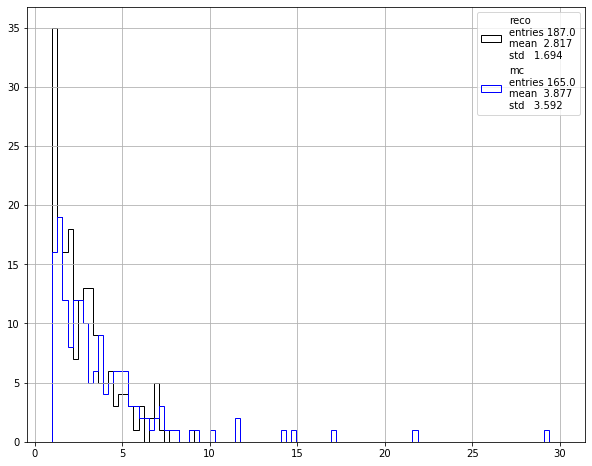

In [11]:
pltext.canvas(1, 1, 8, 10)

pltext.hist(1e3*ene  , 100, range = (1., 30.), label = 'reco');
pltext.hist(1e3*enemc, 100, range = (1., 30.), label = 'mc');
plt.legend();

In [12]:
ene0  = 0.000 # 0.0015
_csel = pltclouds._csel
sel = ene > ene0
dfclouds, _ = clouds.clouds_mc(_csel(coors, sel), steps, ene[sel], coorsmc, enemc)
#dfclouds, _ = clouds.clouds_mc(coorsmc, steps, enemc, coorsmc, enemc)

#dfclouds

In [13]:
draw, plots = pltclouds.get_draw_clouds(dfclouds, coorsmc, enemc)
print(plots)

{'MC-true': False, 'MC-cells': False, 'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'rangers': True}


## Cells

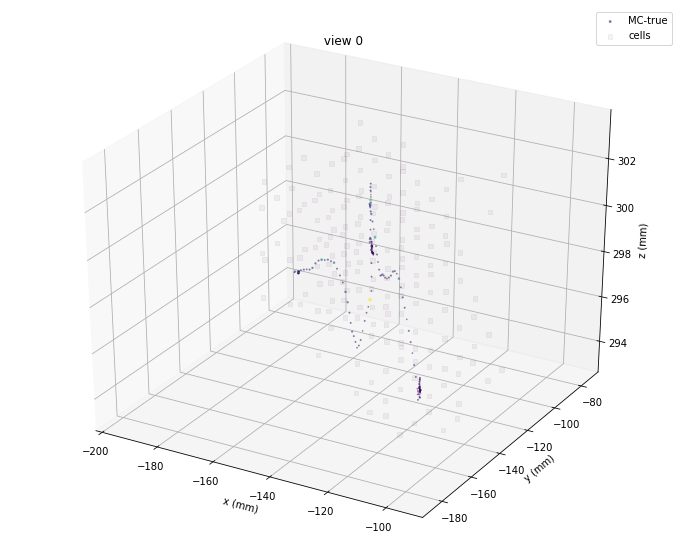

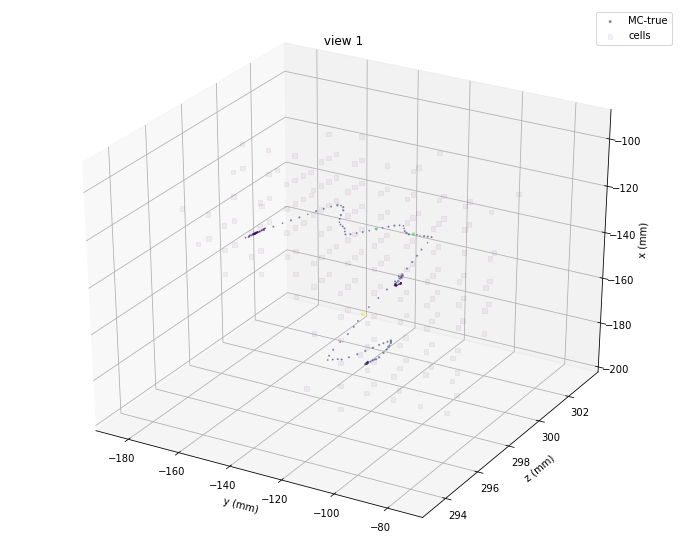

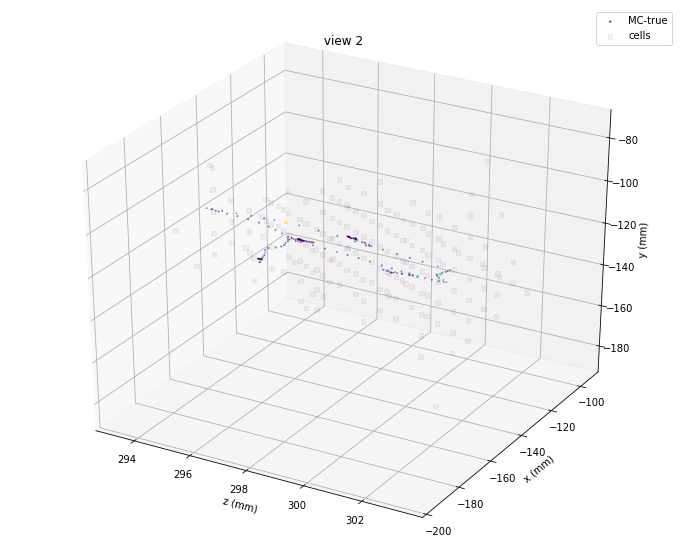

In [14]:
for key in plots.keys(): plots[key] = False
plots['MC-true']  = True
plots['MC-cells'] = False
plots['cells']    = True
for i in range(3): draw(plots, xaxis = i)

## MC

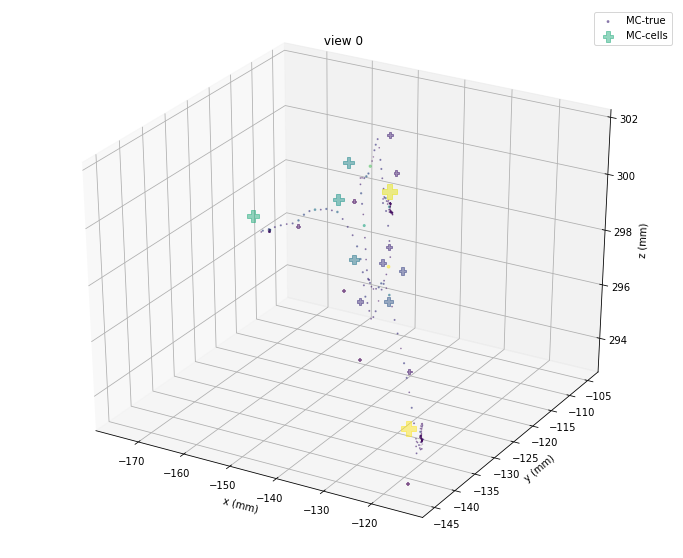

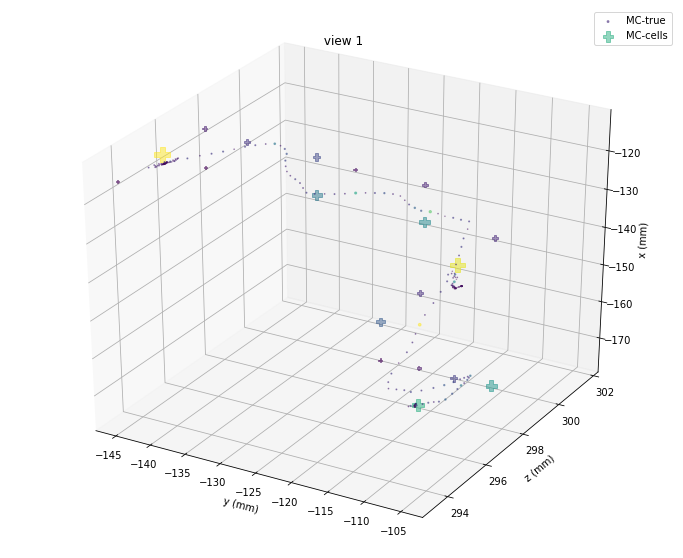

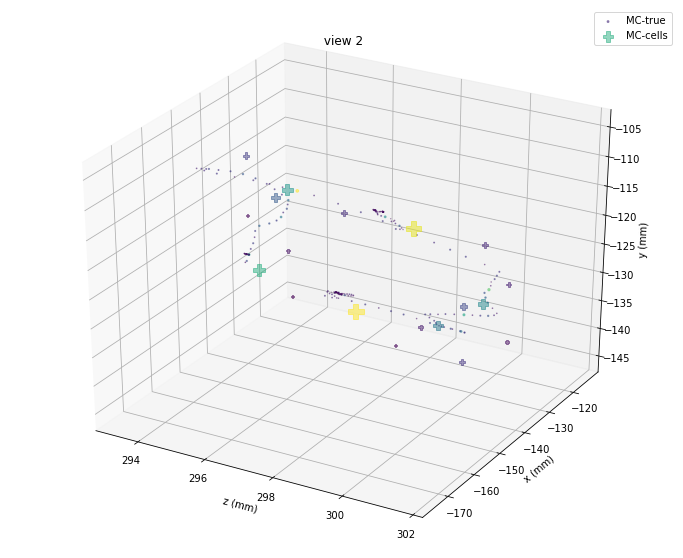

In [15]:
for key in plots.keys(): plots[key] = False
plots['MC-true']  = True
plots['MC-cells'] = True
plots['cells']    = False
for i in range(3): draw(plots, rscale = 2., xaxis = i)

### Reconstruction

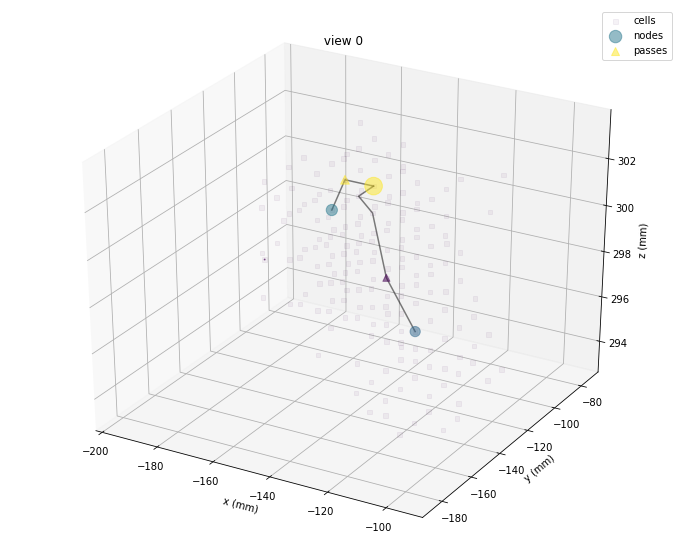

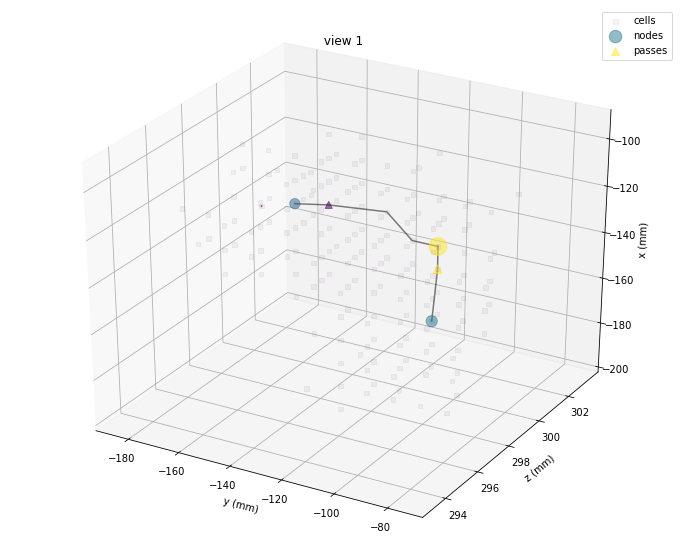

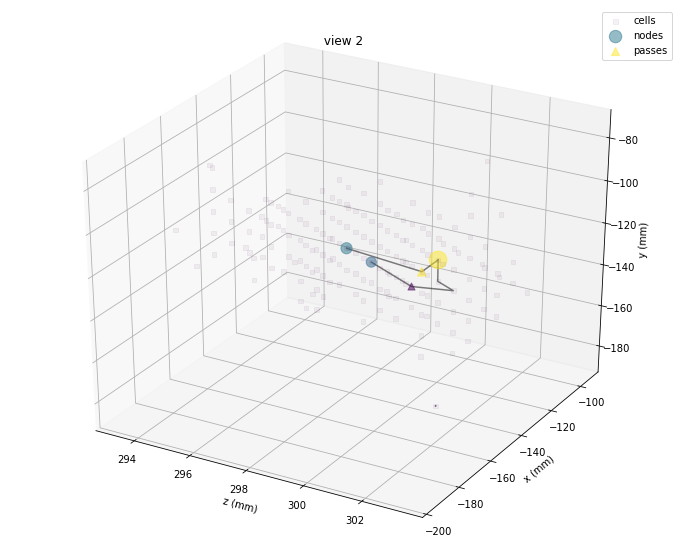

In [16]:
for key in plots.keys(): plots[key] = False
plots['cells']    = True
plots['nodes']    = True
plots['passes']   = True
plots['segments'] = False
plots['tracks']   = True
for i in range(3): draw(plots, rscale = 5., xaxis = i)

## MC-Reco

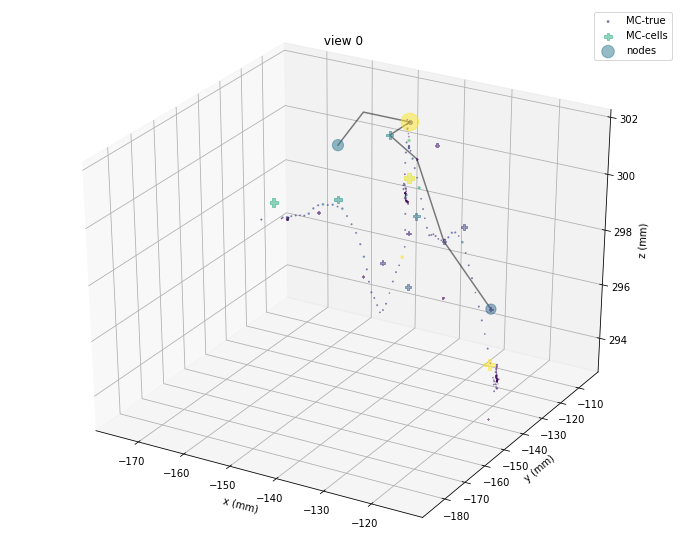

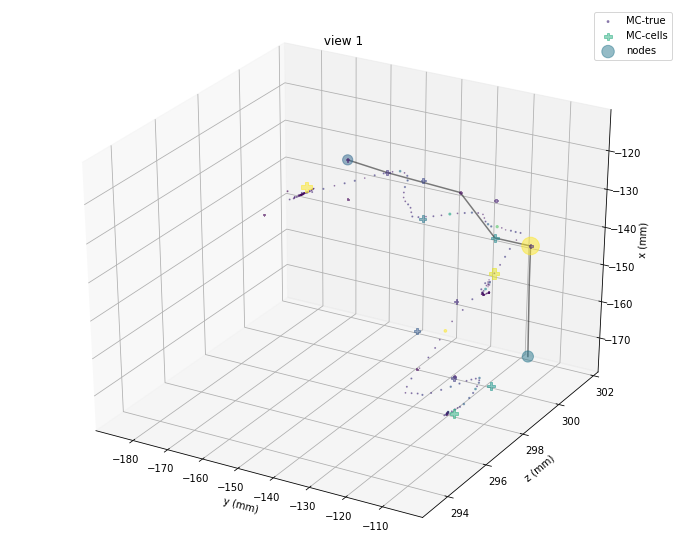

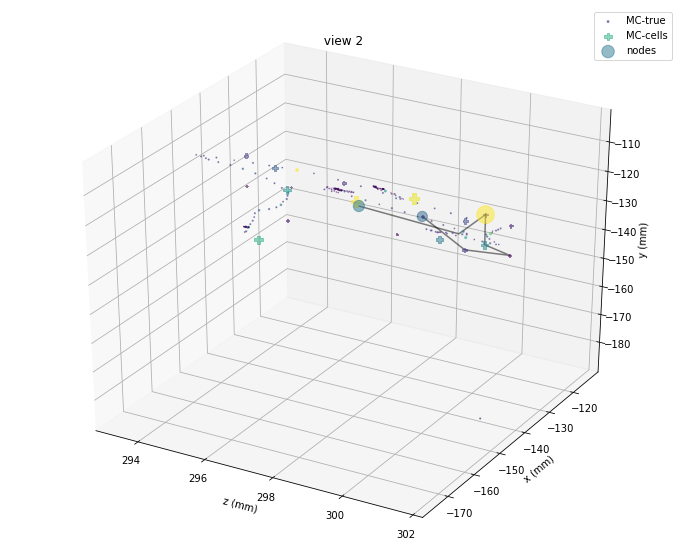

In [17]:
for key in plots.keys(): plots[key] = False
plots['MC-true']  = True
plots['MC-cells'] = True
#plots['cells']    = True
plots['nodes']    = True
#plots['passes']   = True
plots['tracks']   = True
for i in range(3): draw(plots, rscale = 1., xaxis = i, alpha = 0.5)

## MC-reco cells

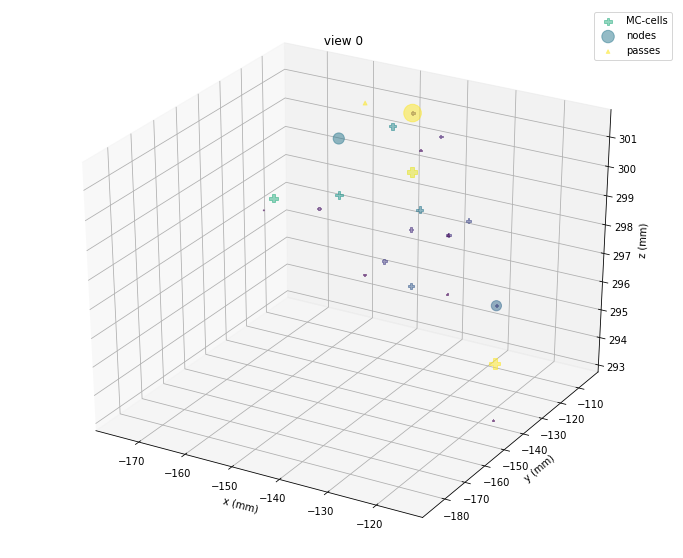

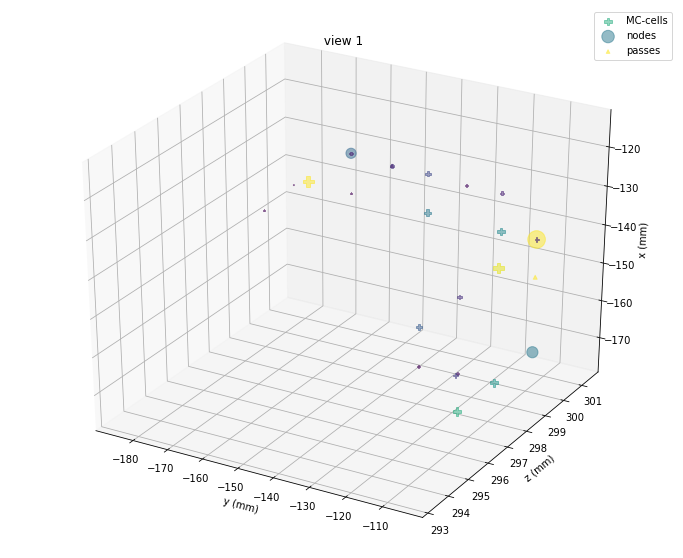

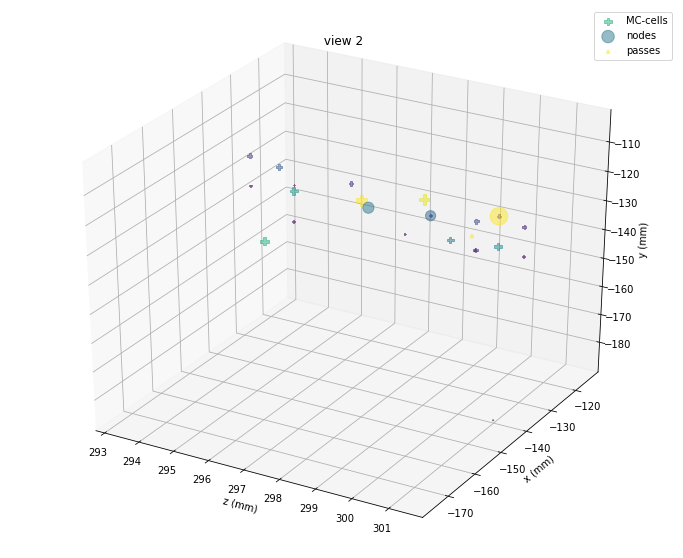

In [18]:
for key in plots.keys(): plots[key] = False
plots['MC-true']  = False
plots['MC-cells'] = True
#plots['cells']    = True
plots['nodes']    = True
plots['passes']   = True
plots['tracks'] = False
for i in range(3): draw(plots, rscale = 1., xaxis = i, alpha = 0.5)

## MC-reco track

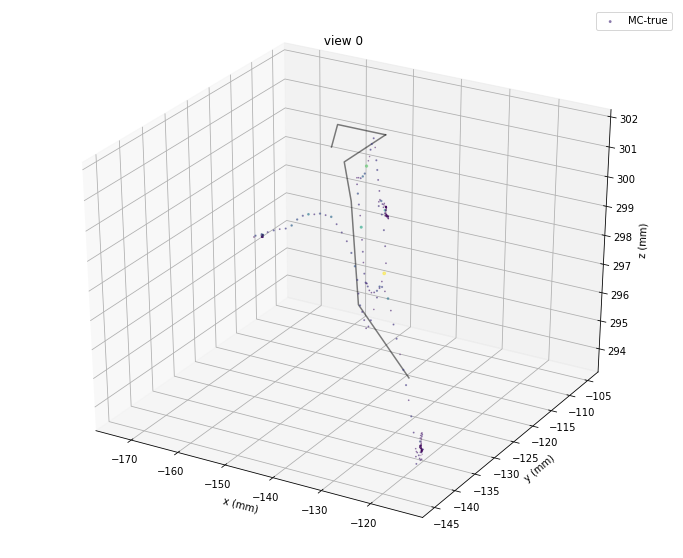

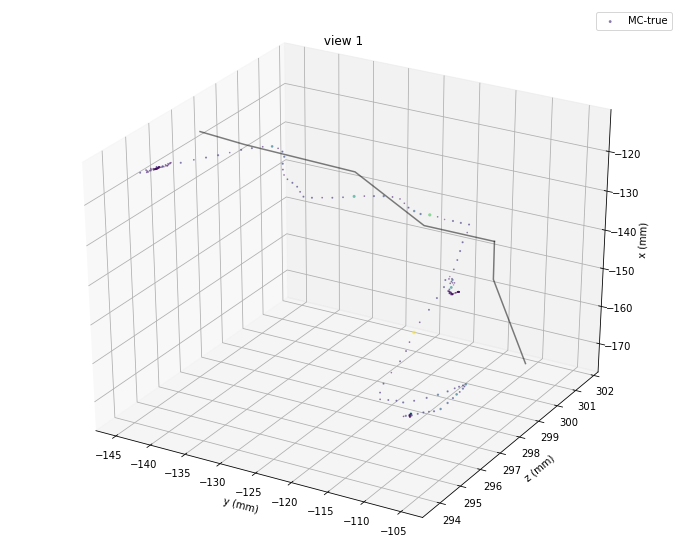

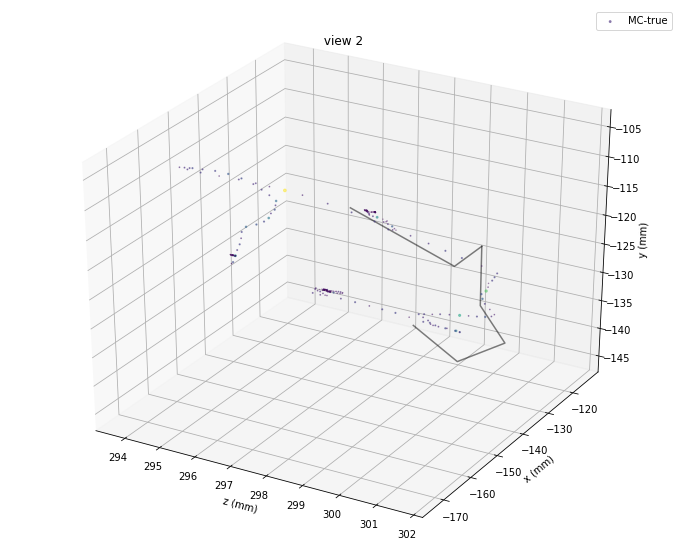

In [19]:
for key in plots.keys(): plots[key] = False
plots['MC-true']  = True
plots['MC-cells'] = False
#plots['cells']    = True
plots['nodes']    = False
plots['passes']   = False
plots['tracks']   = True
for i in range(3): draw(plots, xaxis = i, alpha = 0.5)

**Conclusions:*
    
   * There are many MC events with lower energy thatn Qbb, why?
   
   * In general the reconstructions goes nicely, sometimes confuses the paths and sometimes it breaks the paths